In [1]:
'''from google.colab import files
files=files.upload()'''

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [63]:
df = pd.read_csv("datasets/Mall_Customers.csv") 

In [64]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [66]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [67]:
df.shape

(200, 4)

In [68]:
# checking for NULL data in the dataset
df.isnull().any().any()

False

## Label Encoding

In [69]:
# Encontramos todas las columnas que son string
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Genre'], dtype='object')


In [70]:
#Label Encoding de las que son string
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None


In [71]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Genre = 1 --> Male

## Escalar datos

In [72]:
#Ya podemos escalar todo
stscaler = StandardScaler().fit(df)
X_scaled = stscaler.transform(df)

## Medir bien las distancias

Como tenemos datos numéricos y categóricos hay que crear un métodod de distancia de Gower para ajustar bien.

In [73]:
def gower_distance(x, y):
    # Inicializar la distancia
    distance = 0
    
    # Calcular la distancia de Manhattan para variables numéricas
    for i in range(len(x)):
        if np.issubdtype(type(x[i]), np.number) and np.issubdtype(type(y[i]), np.number):
            distance += abs(x[i] - y[i])
        elif x[i] != y[i]:  # Calcular la distancia de Hamming para variables categóricas
            distance += 1
    
    return distance

## RULE OF THUMB MinPoints

Si el dataset tiene 2 dimensiones, MinPoints = 4

Si tiene más de 2 dimensiones, MinPoints = 2 * Dimensión


### EPSILON

Para calcular Eps, tenemos que medir la distancia entre cada punto y su vecino más cercano, así que utilizamos el algoritmo Nearest Neighbours.

Para encontrar Eps gráficamente, hay que buscar el "codo".


In [74]:
from sklearn.neighbors import NearestNeighbors
# Encontrar las distancias k
k = 9
neighbors = NearestNeighbors(n_neighbors=k, metric=gower_distance) #le pasamos la distancia de Gower que hemos creado
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)

In [75]:
# Ordenar las distancias
distances_sorted = np.sort(distances, axis=0)
distances_mean = distances_sorted.mean(axis=1)

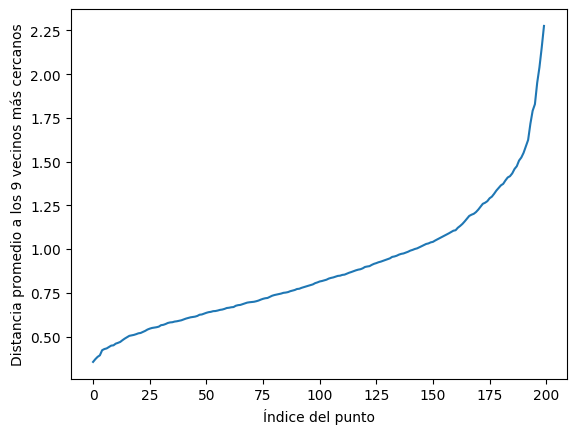

In [76]:
# Graficar las distancias k
plt.plot(distances_mean)
plt.xlabel('Índice del punto')
plt.ylabel(f'Distancia promedio a los {k} vecinos más cercanos')
plt.show()

In [77]:
from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps=1.6, min_samples=6)
clusters1 = dbscan1.fit_predict(X_scaled)

In [78]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, dbscan1.labels_))

Silhouette Coefficient: 0.278


In [79]:
cl=pd.DataFrame(dbscan1.labels_,columns=['Cluster'])

In [80]:
cl.value_counts()

Cluster
1          112
0           88
dtype: int64

In [81]:
df_A = pd.concat([df,cl],axis=1)

## Check Clusters

In [82]:
df_A1 = df_A[df_A['Cluster']==0]
df_A2 = df_A[df_A['Cluster']==1]

In [83]:
df_A1.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,88.0,88.000000,88.000000,88.000000,88.0
mean,1.0,39.806818,62.227273,48.511364,0.0
std,0.0,15.514812,26.638373,27.896770,0.0
min,1.0,18.000000,15.000000,1.000000,0.0
25%,1.0,27.750000,45.500000,24.500000,0.0
50%,1.0,37.000000,62.500000,50.000000,0.0
75%,1.0,50.500000,78.000000,70.000000,0.0
max,1.0,70.000000,137.000000,97.000000,0.0


In [84]:
df_A2.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,112.0,112.000000,112.000000,112.000000,112.0
mean,0.0,38.098214,59.250000,51.526786,1.0
std,0.0,12.644095,26.011952,24.114950,0.0
min,0.0,18.000000,16.000000,5.000000,1.0
25%,0.0,29.000000,39.750000,35.000000,1.0
50%,0.0,35.000000,60.000000,50.000000,1.0
75%,0.0,47.500000,77.250000,73.000000,1.0
max,0.0,68.000000,126.000000,99.000000,1.0


## Clusters

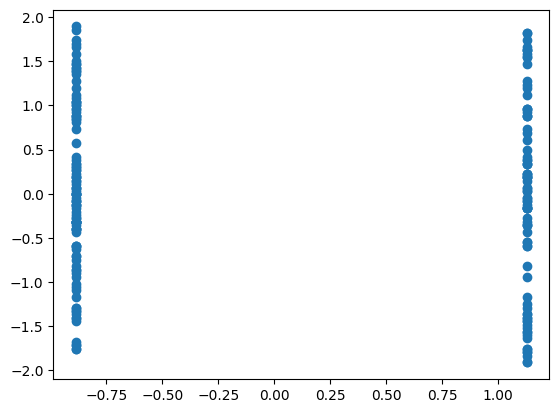

In [92]:
plt.scatter(X_scaled[:,0], X_scaled[:,3])

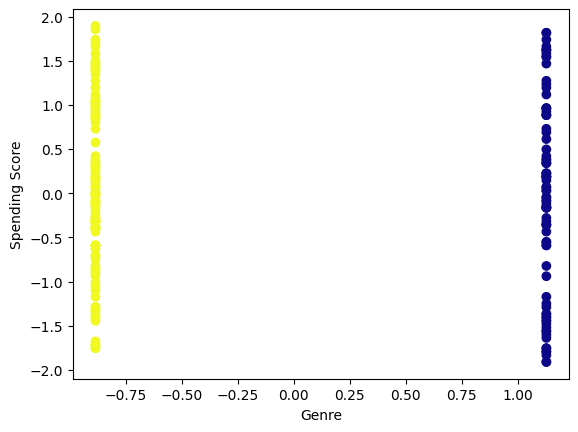

In [94]:
# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:,3], c = clusters1, cmap= "plasma") # plotting the clusters
plt.xlabel("Genre") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

# GRID SEARCH

In [87]:
# Definir el espacio de búsqueda para eps y min_samples
eps_values = np.arange(0.1, 10, 0.1) # rango e incremento
min_samples_values = np.arange(4, 10, 1) # rango e incremento

# Realizar la búsqueda en malla (grid search)
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        
        # Ignorar resultados con solo un cluster o clusters asignados como ruido
        if len(np.unique(clusters)) > 1 and np.any(clusters == -1):
            score = silhouette_score(X_scaled, clusters)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Imprimir los mejores valores de eps y min_samples
print(f"Mejores parámetros: {best_params}, Mejor coeficiente de silueta: {best_score}")

Mejores parámetros: {'eps': 1.3000000000000003, 'min_samples': 7}, Mejor coeficiente de silueta: 0.2664453981873686


In [88]:
# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan2 = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters2 = dbscan2.fit_predict(X_scaled)

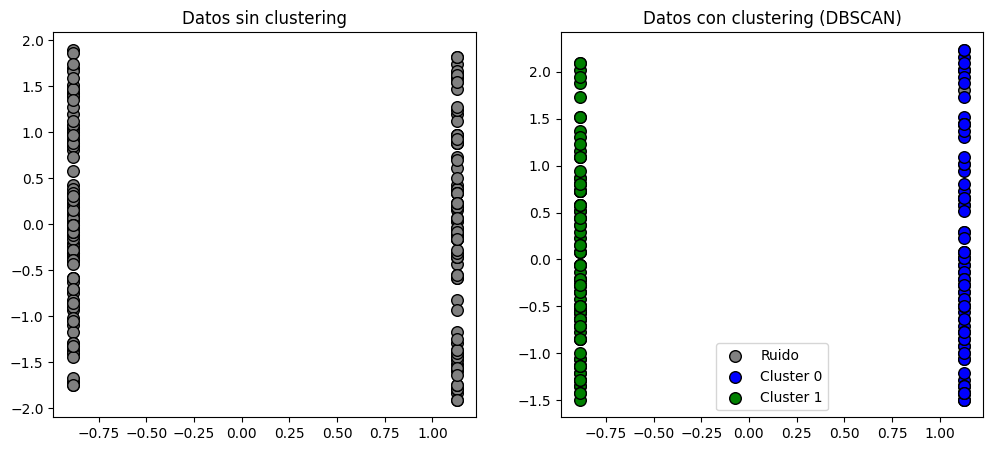

In [95]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Visualizar los datos sin clustering (solo reducción de dimensionalidad con PCA)
ax1.scatter(X_scaled[:, 0], X_scaled[:, 3], c='grey', edgecolor='k', s=70)
ax1.set_title('Datos sin clustering')

# Visualizar los datos con clustering (DBSCAN)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in np.unique(clusters2):
    if i == -1:
        # Puntos asignados como ruido (outliers)
        ax2.scatter(X_scaled[clusters2 == i, 0], X_scaled[clusters2 == i, 1], c='grey', edgecolor='k', s=70, label='Ruido')
    else:
        # Puntos asignados a un cluster
        ax2.scatter(X_scaled[clusters2 == i, 0], X_scaled[clusters2 == i, 1], c=colors[i % len(colors)], edgecolor='k', s=70, label=f'Cluster {i}')

ax2.set_title('Datos con clustering (DBSCAN)')
ax2.legend()

In [96]:
cl2=pd.DataFrame(dbscan2.labels_,columns=['Cluster'])

In [97]:
cl2.value_counts()

Cluster
 1         112
 0          85
-1           3
dtype: int64

In [98]:
df_B = pd.concat([df,cl2],axis=1)

In [101]:
df_B[df_B['Cluster']==0]

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,0
10,1,67,19,14,0
14,1,37,20,13,0
15,1,22,20,79,0
...,...,...,...,...,...
182,1,46,98,15,0
185,1,30,99,97,0
187,1,28,101,68,0
192,1,33,113,8,0


In [99]:
df_B.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000,0.545000
std,0.497633,13.969007,26.264721,25.823522,0.528556
min,0.000000,18.000000,15.000000,1.000000,-1.000000
25%,0.000000,28.750000,41.500000,34.750000,0.000000
50%,0.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,1.000000
max,1.000000,70.000000,137.000000,99.000000,1.000000


In [100]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_B, x='Genre', y='Spending Score (1-100)', z='Age', color='Cluster',title="Mall Clustering with 3 variables")
# fig.write_image("Mall_3d.png")
fig.show()